In [16]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Male vs. Female Vet Suicide Rates

In [17]:
#Read in veteran suicide by sex file
vet_suicide_sex = "../Project_1_Team_2/Veteran Suicides by Sex.csv"
vet_suicide_df = pd.read_csv(vet_suicide_sex)
vet_suicide_df.head()

,Year,Region,State,Total,Male,Female
0,2005,Midwest,Illinois,190,180,10
1,2005,Midwest,Indiana,142,130,12
2,2005,Midwest,Iowa,65,60,5
3,2005,Midwest,Kansas,70,60,10
4,2005,Midwest,Michigan,187,180,7


In [18]:
#Grouped veteran suicide sex data by region and calculated sum of female
#and male suicides for each region
vet_suicide_by_region=vet_suicide_df.groupby(["Region"]).sum()
vet_suicide_by_region

,Year,Total,Male,Female
Region,,,,
Midwest,289512,15489,14168,1321
Northeast,217134,8658,7850,808
South,410142,29996,28020,1976
West,313638,18874,17370,1504


<IPython.core.display.Javascript object>


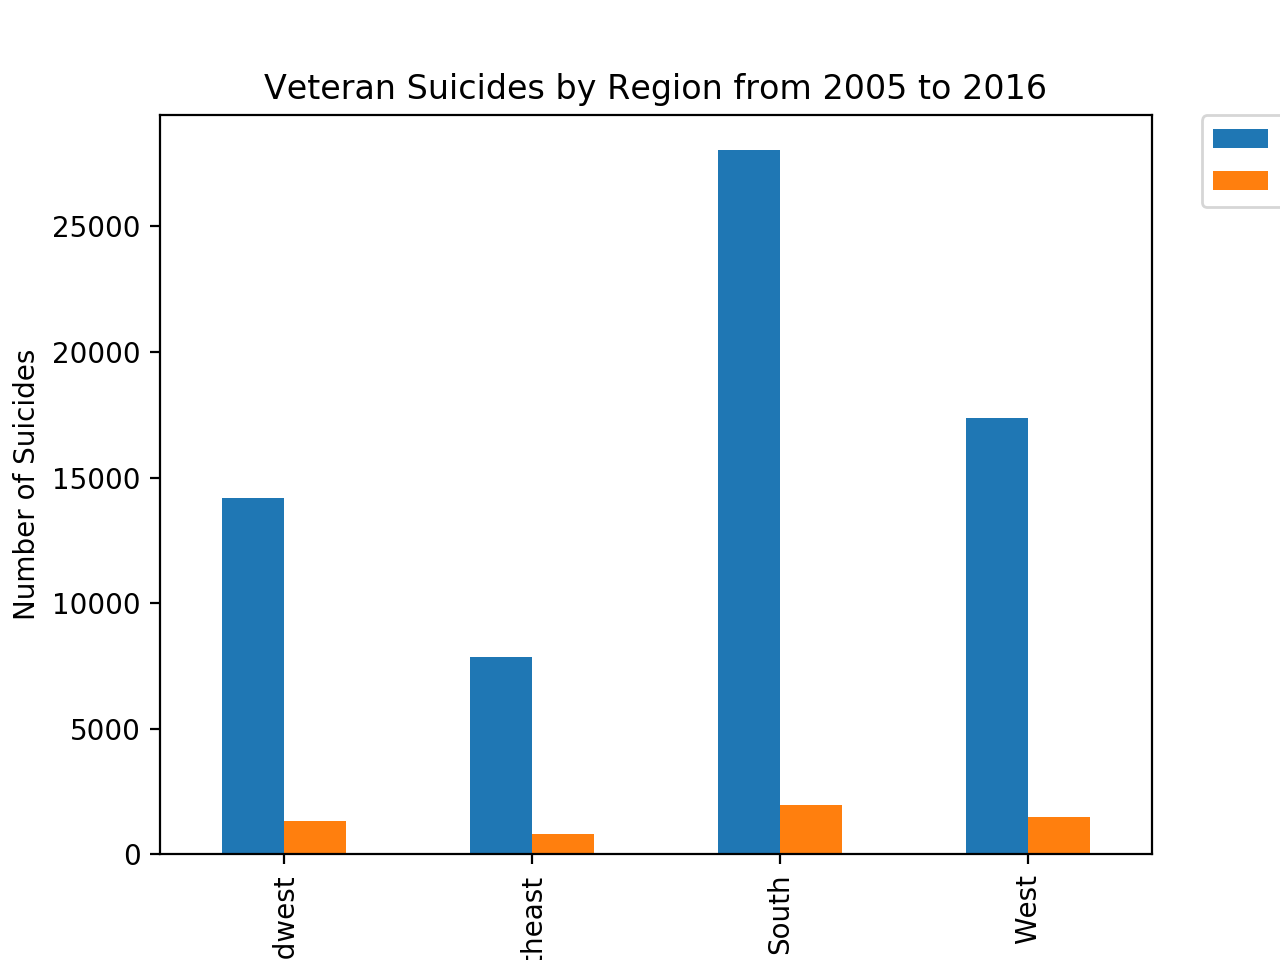

In [19]:
#Create bar graph
Region=vet_suicide_by_region.index
vet_male_female_comp_byregion=vet_suicide_by_region[['Male',
                    'Female']].plot(kind='bar')

#Incorporate graph features
plt.ylabel('Number of Suicides')
plt.xlabel('Region')
plt.title('Veteran Suicides by Region from 2005 to 2016')

#Create legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Save graph as a png
plt.savefig('Fig Bar Chart- Veteran Suicides by Region from 2005 to 2016',
            bbox_inches='tight')

<IPython.core.display.Javascript object>


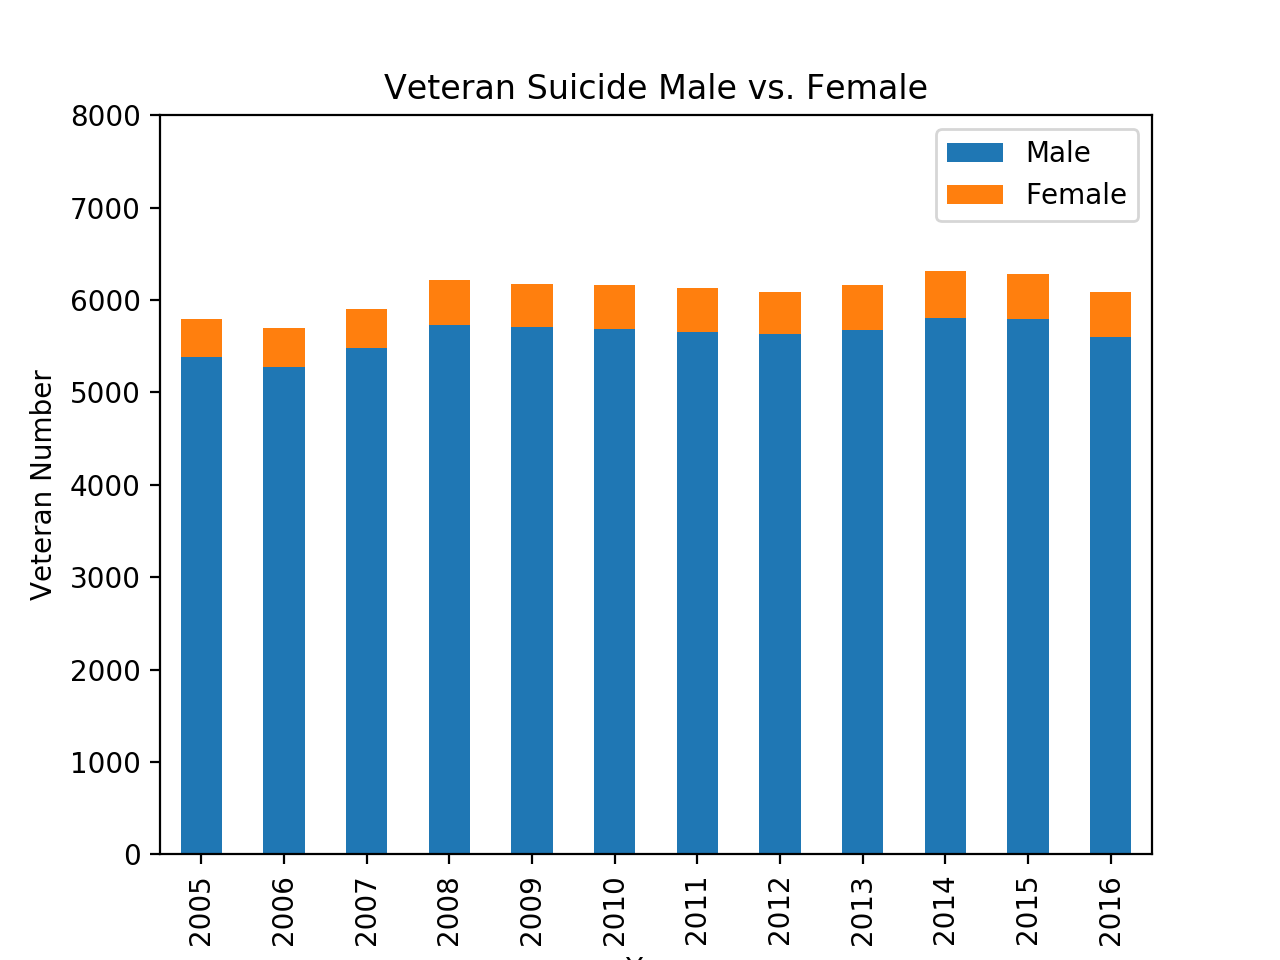

In [20]:
#Grouped veteran suicide sex data by year and calculated sum of female
#and male suicides for each year
vet_groupby_sum_1 = vet_suicide_df.groupby('Year').sum()
ax = vet_groupby_sum_1[['Male','Female']].plot(kind='bar', stacked=True)
ax.set(title = 'Veteran Suicide Male vs. Female',
       xlabel = 'Year',
       ylabel = 'Veteran Number',
       ylim = (0,8000))
ax.legend(loc = 'best', frameon=True)


# Save the Figure
plt.savefig("../Project_1_Team_2/Veteran Suicide Male vs. Female.png",bbox_inches='tight')



# Suicide by Age (Vet and Civilian)

In [21]:
# Read in suicide by age file
vet_suicide_age = "../Project_1_Team_2/Suicides by Age.csv"
vet_age_df = pd.read_csv(vet_suicide_age)
vet_age_df.head()

,Year,"Geographic Region, Based on state of death",State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
0,2005,Total U.S.,Total U.S.,Total,"5,797",23.9,"31,610",14.7
1,2005,Total U.S.,Total U.S.,18-34,544,25.2,"8,455",13.1
2,2005,Total U.S.,Total U.S.,35-54,"2,063",29.0,"13,541",15.9
3,2005,Total U.S.,Total U.S.,55-74,"1,868",18.7,"6,554",13.5
4,2005,Total U.S.,Total U.S.,75+,"1,319",26.3,"3,060",18.7


In [22]:
# Extract rows where state of death = Total U.S.
vet_age_df2 = vet_age_df.loc[vet_age_df["State of Death"].isin(["Total U.S."])]
vet_age_df2.head(20)
list(vet_age_df2)

['Year',
 'Geographic\nRegion,\nBased on\nstate of\ndeath',
 'State of Death',
 'Age\nGroup',
 'Veteran\nSuicides',
 'Veteran\nSuicide\nRate\nper\n100,000',
 'General\nPopulation\nSuicides',
 'General\nPopulation\nRate per\n100,000']

In [23]:
# Veteran Age Group Comparison (Total)
# Age Group != total
vet_age_df3 = vet_age_df2.loc[vet_age_df2["Age\nGroup"]!="Total",:]

vet_age_df3.head()

,Year,"Geographic Region, Based on state of death",State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
1,2005,Total U.S.,Total U.S.,18-34,544,25.2,"8,455",13.1
2,2005,Total U.S.,Total U.S.,35-54,"2,063",29.0,"13,541",15.9
3,2005,Total U.S.,Total U.S.,55-74,"1,868",18.7,"6,554",13.5
4,2005,Total U.S.,Total U.S.,75+,"1,319",26.3,"3,060",18.7
281,2006,,Total U.S.,18-34,482,22.7,"8,453",12.3


In [33]:
#create a new df with the data need needed
vet_age_df4 =  vet_age_df3.drop(columns = ['Geographic\nRegion,\nBased on\nstate of\ndeath',
                                           'State of Death',
                                           'Veteran\nSuicides',
                                           'General\nPopulation\nSuicides'])
vet_age_df4.head()

,Year,Age Group,"Veteran Suicide Rate per 100,000","General Population Rate per 100,000"
1,2005,18-34,25.2,13.1
2,2005,35-54,29.0,15.9
3,2005,55-74,18.7,13.5
4,2005,75+,26.3,18.7
281,2006,18-34,22.7,12.3


In [34]:
#group by age group and year
vet_age_df5 = vet_age_df4.groupby(['Year','Age\nGroup']).sum()
vet_age_df5.head()

Veteran\nSuicide\nRate\nper\n100,000  \
Year Age\nGroup                                        
2005 18-34                                      25.2   
     35-54                                      29.0   
     55-74                                      18.7   
     75+                                        26.3   
2006 18-34                                      22.7   

                General\nPopulation\nRate per\n100,000  
Year Age\nGroup                                         
2005 18-34                                        13.1  
     35-54                                        15.9  
     55-74                                        13.5  
     75+                                          18.7  
2006 18-34                                        12.3

In [35]:
#Reset index for data frame and determine data type
vet_age_df5.reset_index().head()
vet_age_df5.dtypes

Veteran\nSuicide\nRate\nper\n100,000      object
General\nPopulation\nRate per\n100,000    object
dtype: object

In [36]:
#convert all DataFrame columns to the int64 dtype
vet_age_df5 = vet_age_df5.astype(float)

In [37]:
# Minor Data Munging to Re-Format the Data Frames

vet_age_df6 = pd.pivot_table(vet_age_df5, index='Year', columns='Age\nGroup', 
                             values='Veteran\nSuicide\nRate\nper\n100,000')
vet_age_df6.head(20)

Age Group,18-34,35-54,55-74,75+
Year,,,,
2005,25.2,29.0,18.7,26.3
2006,22.7,28.8,19.8,25.9
2007,25.0,30.4,20.8,27.3
2008,26.8,32.3,23.1,27.4
2009,26.4,32.0,23.0,29.6
2010,28.0,32.3,23.5,29.0
2011,30.6,32.8,23.5,28.5
2012,32.3,32.8,23.6,28.6
2013,37.1,32.0,24.9,28.6


<IPython.core.display.Javascript object>


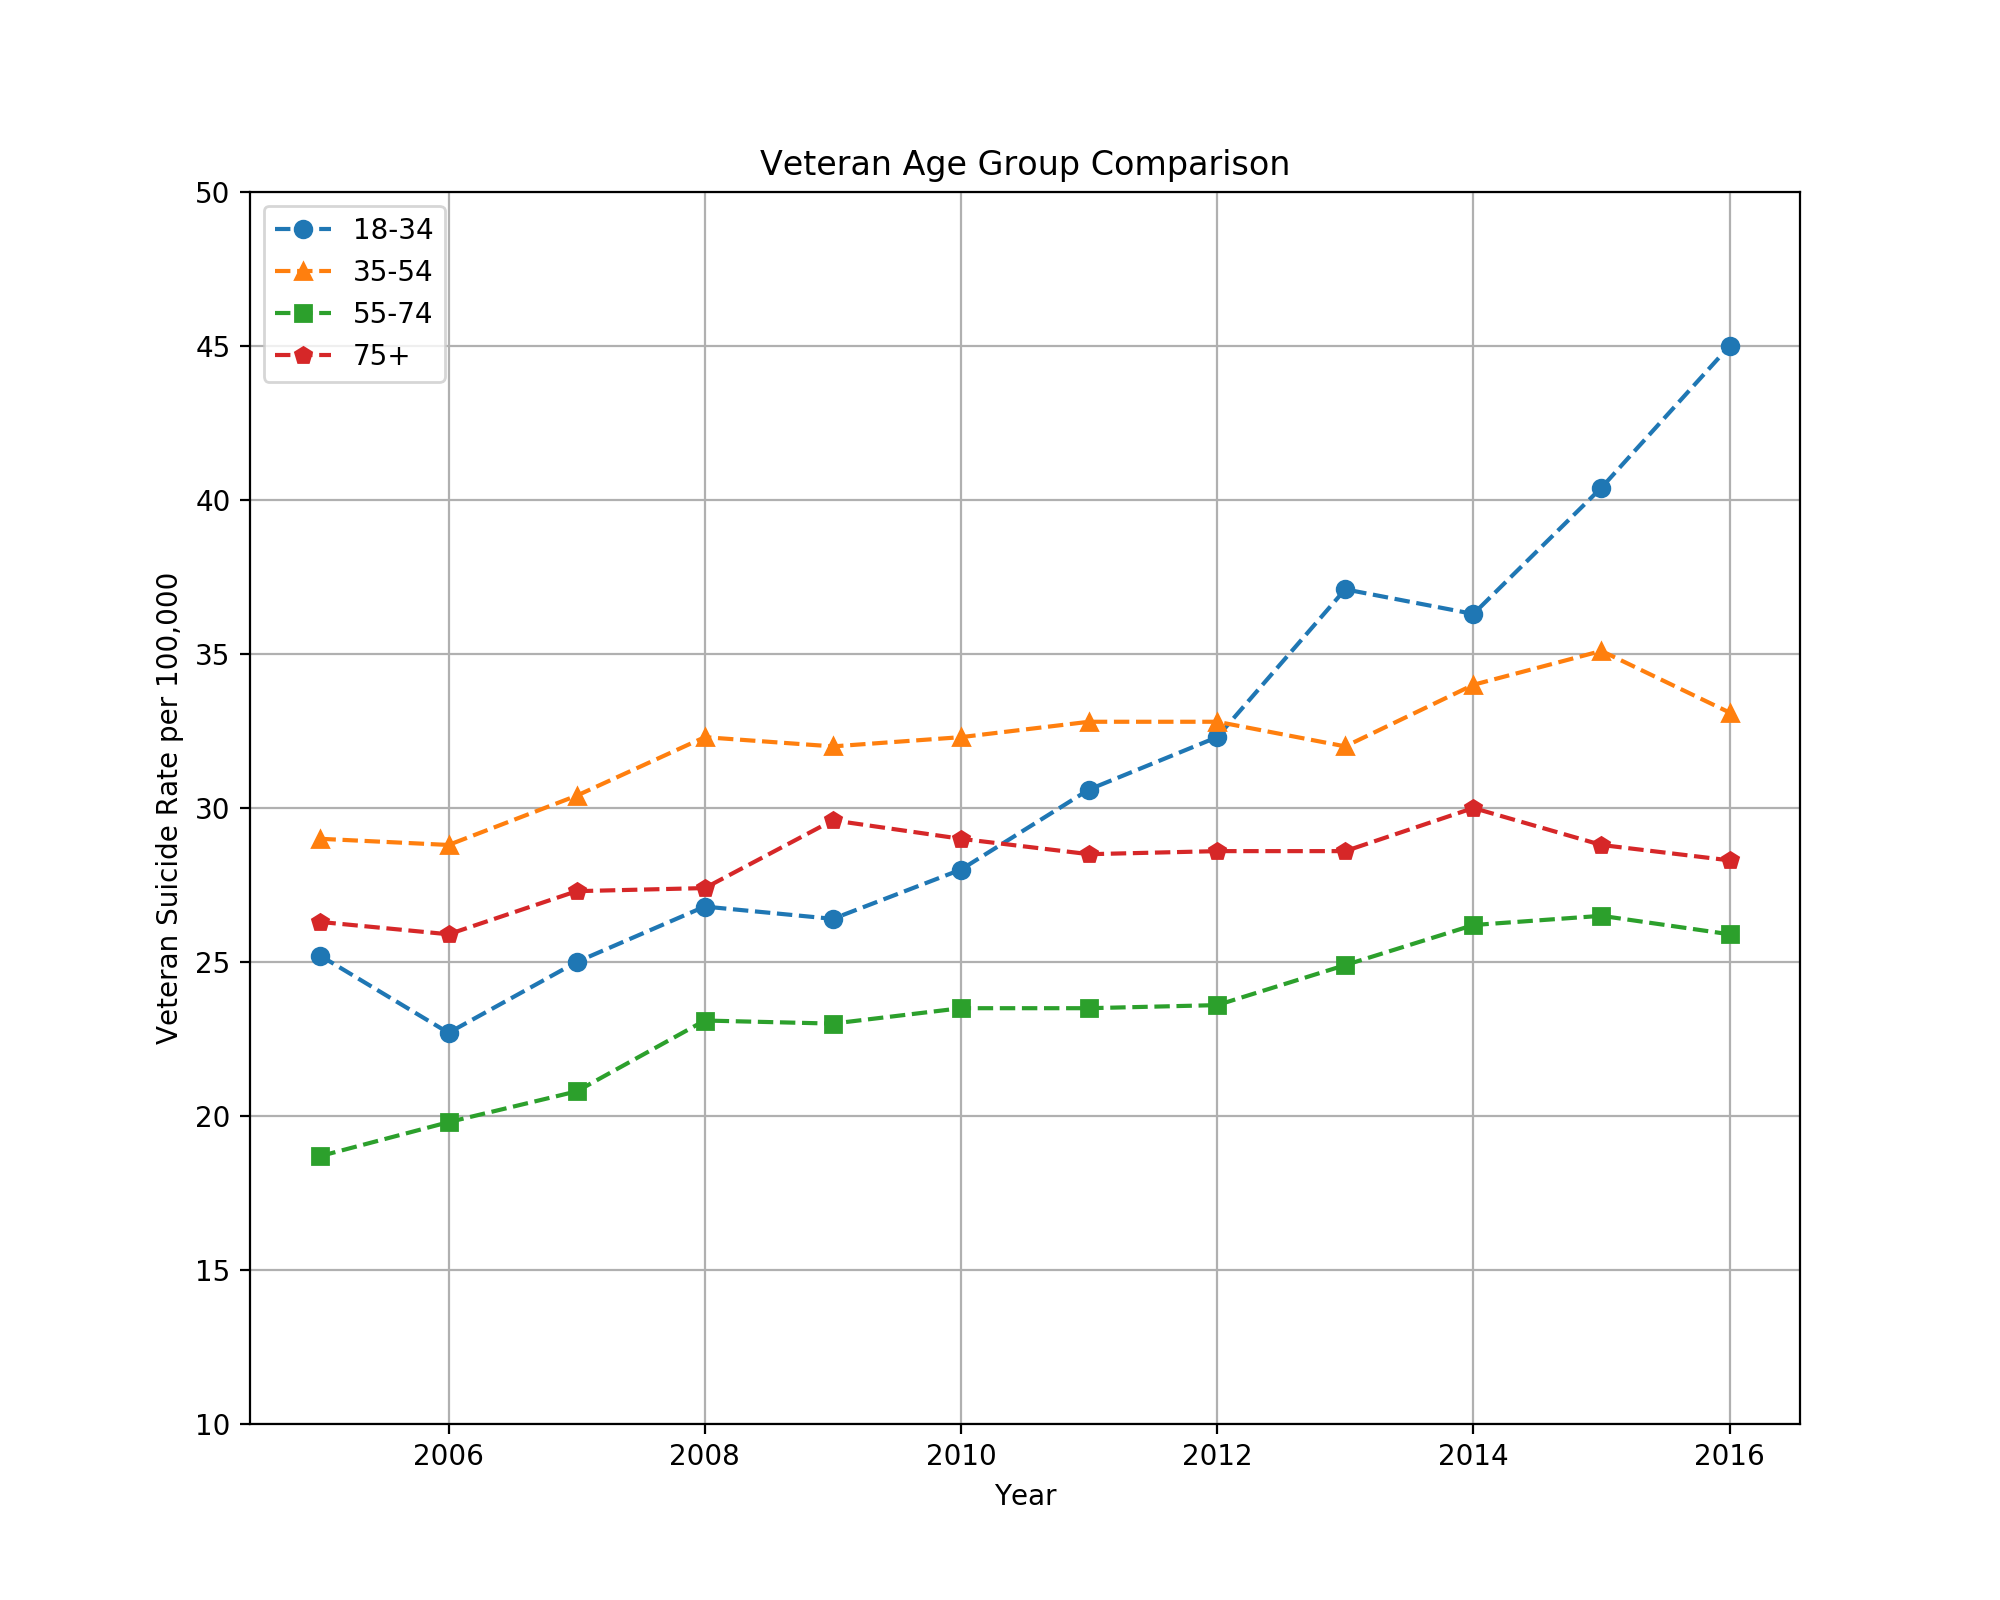

In [38]:
# Generate the Plot 
Timepoint = vet_age_df6.index
plt.figure(figsize=(10,8))
plt.plot(Timepoint, vet_age_df6['18-34'], marker ='o', linestyle='--', label="18-34")
plt.plot(Timepoint, vet_age_df6['35-54'], marker ='^', linestyle='--', label="35-54")
plt.plot(Timepoint, vet_age_df6['55-74'], marker ='s', linestyle='--', label="55-74")
plt.plot(Timepoint, vet_age_df6['75+'], marker ='p', linestyle='--', label="75+")
plt.gca().set(xlabel = 'Year', ylabel = 'Veteran Suicide Rate per 100,000',
              title = 'Veteran Age Group Comparison',ylim=(10,50))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("../Project_1_Team_2/Veteran Age Group Comparison.png")
plt.show()

In [39]:
vet_age_df7 = pd.pivot_table(vet_age_df5, index='Year', columns='Age\nGroup', 
                             values='General\nPopulation\nRate per\n100,000')
vet_age_df7.head(20)

Age Group,18-34,35-54,55-74,75+
Year,,,,
2005,13.1,15.9,13.5,18.7
2006,12.3,16.1,13.8,16.0
2007,12.7,16.7,14.4,16.1
2008,12.7,17.3,15.3,15.9
2009,12.5,17.8,15.7,15.7
2010,13.5,17.9,16.0,16.3
2011,14.0,18.1,16.0,16.6
2012,14.1,18.4,16.5,17.1
2013,14.1,18.1,16.9,17.6


<IPython.core.display.Javascript object>


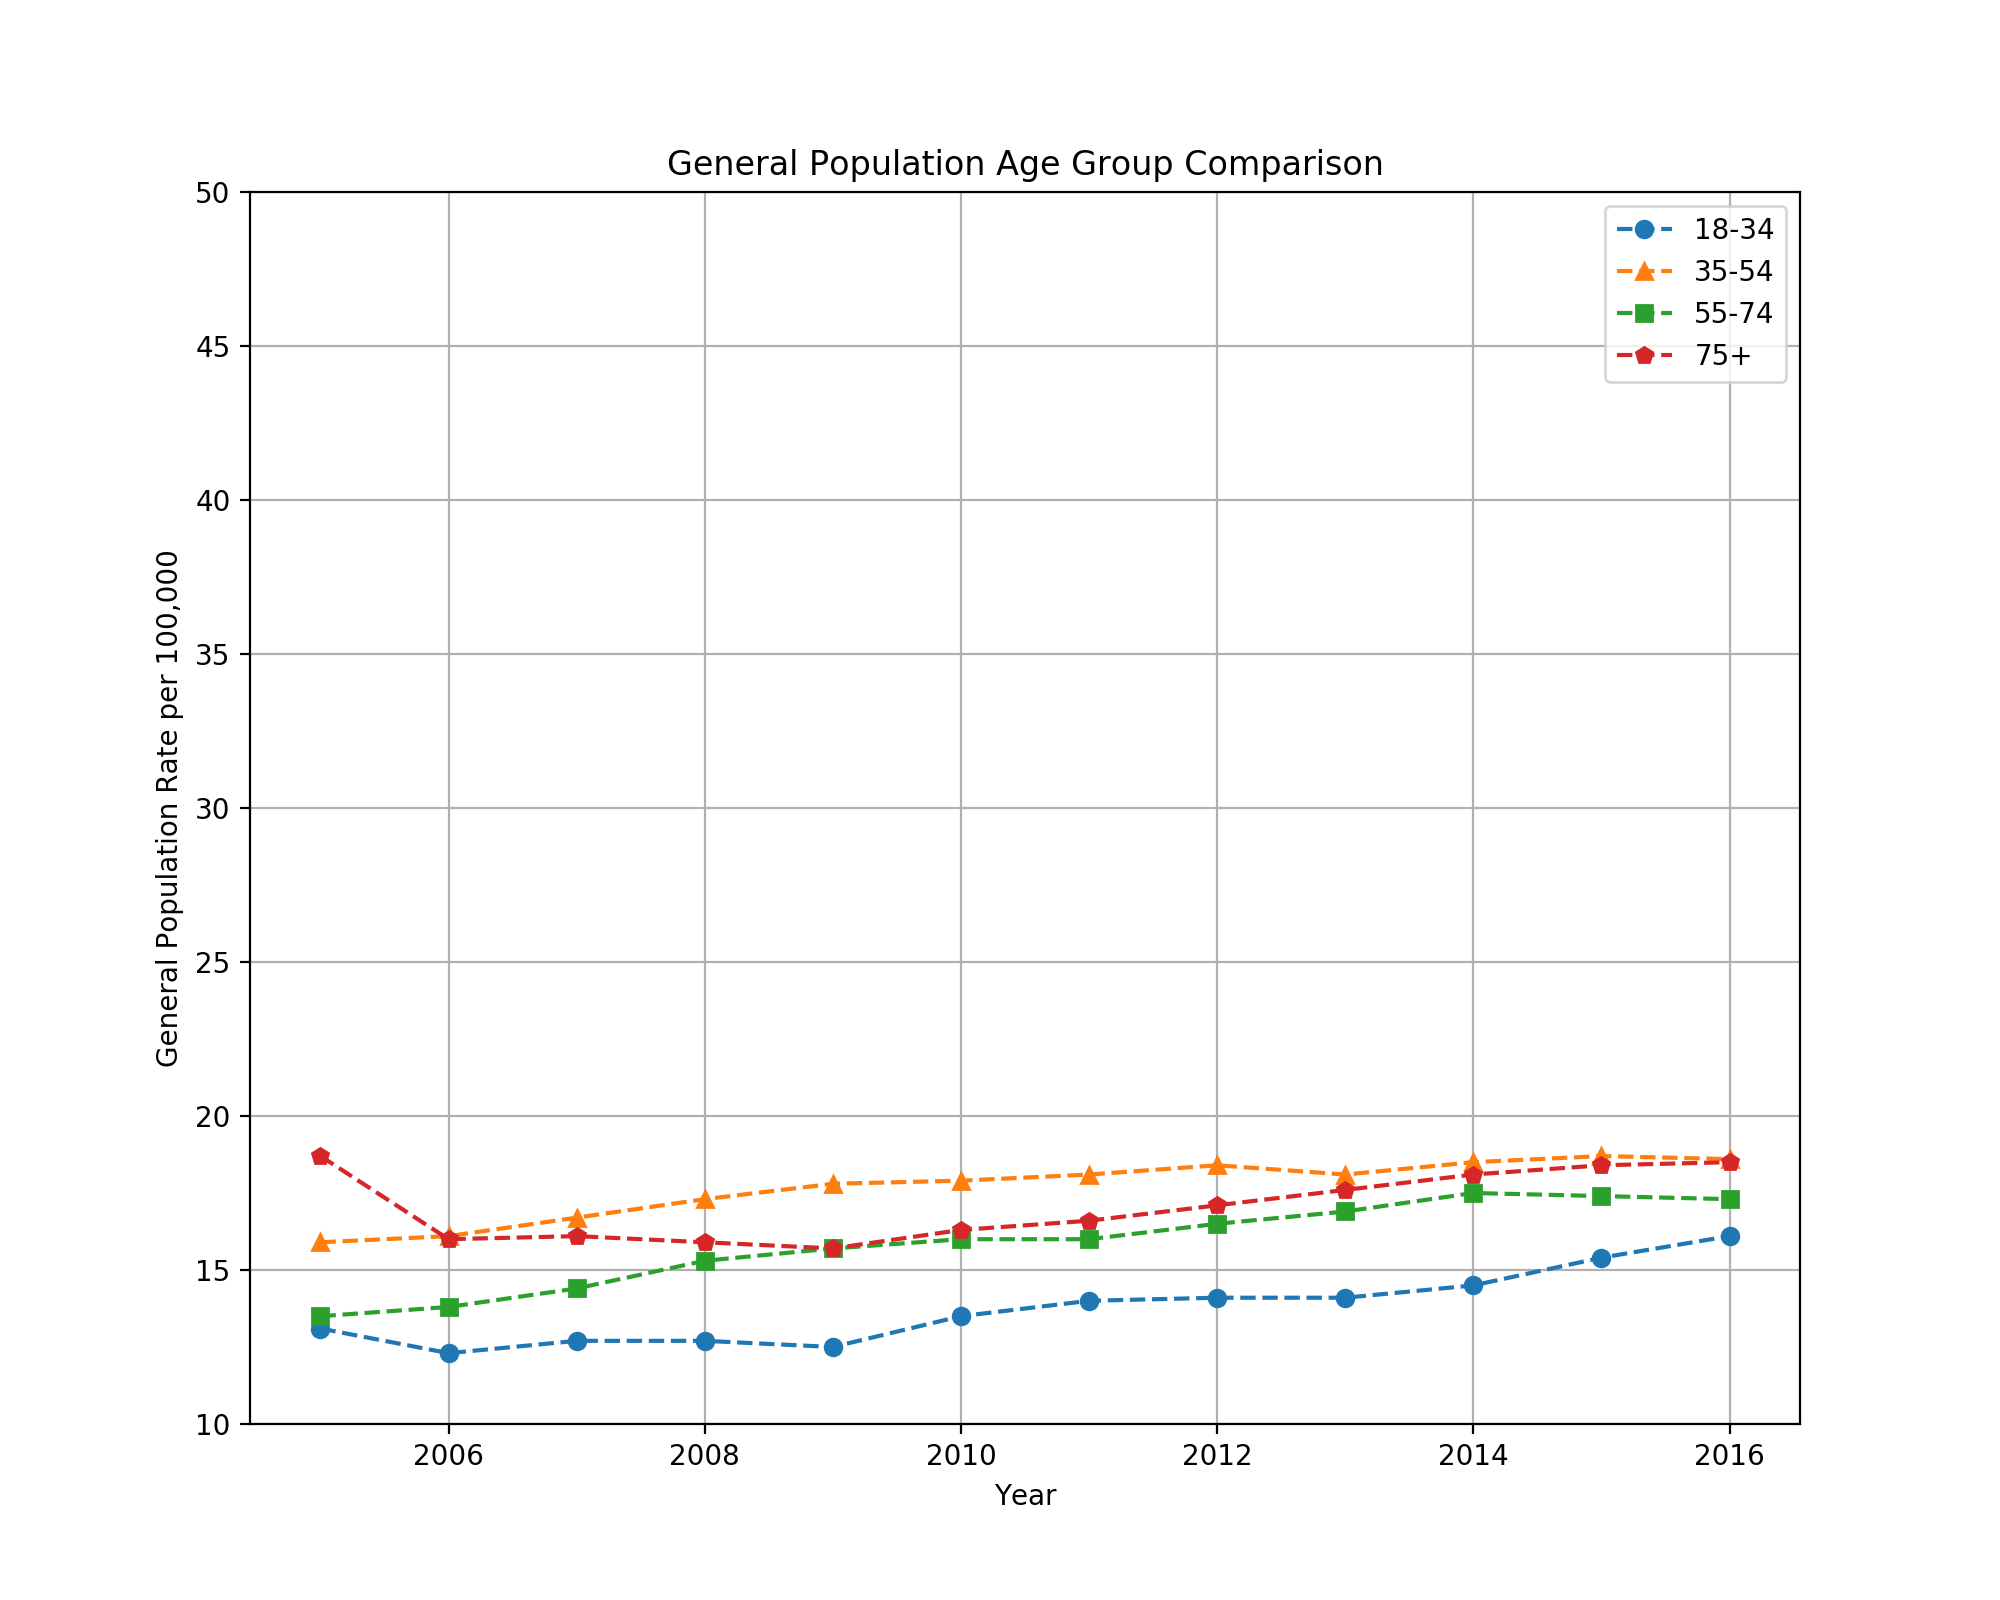

In [40]:
plt.figure(figsize=(10,8))
plt.plot(Timepoint, vet_age_df7['18-34'], marker ='o', linestyle='--', label="18-34")
plt.plot(Timepoint, vet_age_df7['35-54'], marker ='^', linestyle='--', label="35-54")
plt.plot(Timepoint, vet_age_df7['55-74'], marker ='s', linestyle='--', label="55-74")
plt.plot(Timepoint, vet_age_df7['75+'], marker ='p', linestyle='--', label="75+")
plt.gca().set(xlabel = 'Year', ylabel = 'General Population Rate per 100,000',
              title = 'General Population Age Group Comparison', ylim=(10,50))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("../Project_1_Team_2/General Population Age Group Comparison.png")
plt.show()